# Random Forest 

* **Birden fazla ağaç oluşturulur ve hata olarak birbirileri ile karşılaştırılır. En az hata veren ağaca daha çok yüklenir.**
* **Her ağaç veri setinden belirlir bir gözlem sayısının içerisinden farklı gözlemler atanarak hataları hesaplattırılır.**
* **Geriye kalan veri setindeki gözlemleri ağaçları karşılaştırılması için kullanılır.**

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  #lojistic algoritması
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier  #KNneighbors algoritması
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC #destek vektor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns   #grafik çizmek için
import matplotlib.pyplot as plt #grafik çizmek için


In [7]:
#veri
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis = 1)
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size = 0.30, random_state = 42)

### Model & Tahmin

* **n_estimator : ağaç sayısı**
* **max_features : Bölünmelerde göz önünde bulundurulması gereken değişken sayısı parametre**
* **min_samples_split : son evrede ağacın min gözlem sayısını göstermektedir**
* **max_depth : dallanma derinliği parametresi**

* **_Random forest ve CART da dallanamalar sonucu overfitting(aşırı öğrenme) gerçekleşecektir.Buna engel olmak için max_samples_split ve max_depth parametreleri vardır.!!!_**

In [8]:
random_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = random_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7337057728119181

### Model Tuning

In [9]:
random_model = RandomForestClassifier().fit(X_train, y_train)

In [13]:
params = { "n_estimators" :[ 500, 2000],
         "min_samples_split": [2, 5, 10,20],
         "max_features":[2, 4, 8]}

In [14]:
random_cv = GridSearchCV(random_model, params, cv= 10, n_jobs = -1 , verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.8min finished


In [15]:
random_cv.best_params_

{'max_features': 8, 'min_samples_split': 5, 'n_estimators': 2000}

In [19]:
#final
random_tuned = RandomForestClassifier(n_estimators = 2000, min_samples_split = 5, max_features =8 ).fit(X_train, y_train)
y_pred = random_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7355679702048417

### Değişken Önem Düzeyi

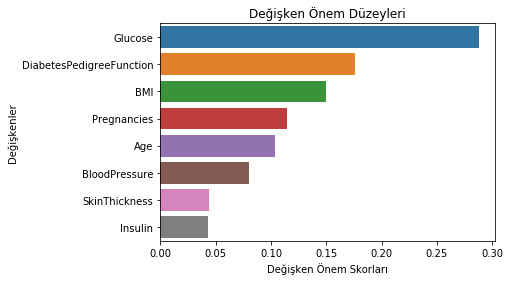

In [22]:
feature_imp = pd.Series(random_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

* **Bağımsız değişkenlerin bağımlı değişkeni etkileme sıralaması grafikte görülür.**